In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from torch.utils.data import DataLoader
import torch
import os
import torchvision.transforms as transforms
from faster_rcnn.utils.datasets.voc.voc import VOCDetection
from faster_rcnn.utils.datasets.adapter import convert_data
from faster_rcnn.utils.display.images import imshow, result_show
from faster_rcnn.utils.datasets.merge  import VOCMerge

In [3]:
root = '/data/data'
ds = VOCMerge(root, 'train', dataset_name='tmp')
val_ds = VOCMerge(root, 'val', dataset_name='tmp')
print(len(val_ds))
batch_size = 1

7924


In [4]:
train_data_loader = DataLoader(ds, batch_size=batch_size, shuffle=True, collate_fn=convert_data, num_workers=0, drop_last=True)
val_data_loader = DataLoader(val_ds, batch_size=batch_size, collate_fn=convert_data, num_workers=0, drop_last=True)

In [9]:
categories = ds.classes
print(len(categories))

435


In [13]:
from faster_rcnn.faster_rcnn import FastRCNN
net = FastRCNN(categories, debug=False)

In [16]:
net.load_state_dict(torch.load('./checkpoints/faster_model.pkl'))

In [17]:
import random, string

def randomword(length):
   letters = string.ascii_lowercase
   return ''.join(random.choice(letters) for i in range(length))

In [20]:
with torch.no_grad():
    for i, data in enumerate(val_data_loader):
        file_name = randomword(10)
        print file_name + ".txt"
        if not data:
            continue
        batch_tensor, im_info, batch_boxes, batch_boxes_index, _ = data
        pred_boxes, scores, classes, rois, im_data = net.detect_blob(batch_tensor, im_info, 0.2)
        for k in range(batch_tensor.shape[0]):
            with open(os.path.join('./evaluate/ground-truth/', file_name + ".txt"), "w") as f:
                for box in batch_boxes:
                    f.write("%s %d %d %d %d\n" % (categories[int(box[4])] , box[0],box[1],box[2],box[3]))
                    
                    
            with open(os.path.join('./evaluate/predicted/', file_name + ".txt"), "w") as f:
                for box in zip(classes, scores, pred_boxes):
                    f.write("%s %.2f %d %d %d %d\n" % (box[0], box[1], box[2][0], box[2][1],box[2][2],box[2][3]))
#             imshow(batch_tensor[k], predict_boxes=batch_boxes[ np.where(batch_boxes_index == k )])
#             result_show(im_data[0], pred_boxes, classes, scores)

dqqfvlmujx.txt
qiwyuinydw.txt
xxccshbutl.txt
ynmhjmyexl.txt
vsvnmtqkbw.txt
odjnpblpxn.txt
gcrnofzdsw.txt
zyigxgkaxc.txt
koajbpgpyc.txt
zhczcfmuen.txt
aygwrzwcza.txt
dljskvqocp.txt
xvebrxyhdy.txt
megzgljeou.txt
eguiptthbw.txt
dinccplezv.txt
nqhsuulpov.txt
kfytfojsxk.txt
uouflvykwv.txt
ngbknzempt.txt
cebpziphsg.txt
mjycpmigis.txt
hbsmonfkoy.txt
fbniievafb.txt
ymtdhzrduz.txt
sbjaoftzcz.txt
yhgiclckfo.txt
hulufsqyze.txt
pshjfzepfg.txt
dwrsabyhrt.txt
hrsfseybpv.txt
rdizusbvoi.txt
mqxibwwafs.txt
wmbredbopi.txt
aojndzzfir.txt
xrpmhmqhzh.txt
icjixblicf.txt
ycvmoovkiv.txt
rernadqjem.txt
itwvidqoer.txt
qgifxympmr.txt
eglllqcdkp.txt
pbncnyanlu.txt
oclepfqkrl.txt
hbdbyyxkna.txt
yakicwkifk.txt
wvrplwrcpm.txt
zgqatfxxcg.txt
qbcgopdkcc.txt
rbahaaqlgb.txt
fvpgzjjwgs.txt
iizywiwxxi.txt
zuhlwulyup.txt
ozkikpdkgb.txt
bmubvnuqsw.txt
fmsjoxyrqr.txt
gptfptmdtl.txt
tjlrkgvfxh.txt
cvutotrges.txt
jldoipjehu.txt
mavxmvzktc.txt
acttttvzaa.txt
dobamcnpwh.txt
lmfmdeovws.txt
rlhupopwti.txt
dveezqxnkk.txt
ctkykkaage

wvvdjnoxgs.txt
vndguuqekd.txt
coqyoilfxs.txt
pnbohffdun.txt
cycrxwlwug.txt
cctkqlaxiu.txt
ubxxgvzgzb.txt
gichgzcobm.txt
mojrxyctxc.txt
gmhluhkhlq.txt
dvwcntifbd.txt
mjrnaxbolh.txt
hxviioysar.txt
sqmvkblqzh.txt
tzvbtubuqz.txt
jixrrsnmmm.txt
vrbskqecti.txt
odyygpmdrb.txt
xsvnwcnram.txt
efyvtfvhzy.txt
xmuekdhgyf.txt
hflwvxotat.txt
vihgzqlffu.txt
xuwhszydqi.txt
lzbgaqjuym.txt
dvmogqlrua.txt
mrhfodvrig.txt
eivbmqsajl.txt
aigrnoupmd.txt
bogstsyzso.txt
ajiwjyoeft.txt
ruvumfwnxe.txt
lfkrtwolas.txt
ftgkismpjy.txt
tduftaeilg.txt
iptukmoyjk.txt
sirwxkcbjp.txt
fehuajbpmy.txt
mhlfhgldfq.txt
qmwxktxsxs.txt
dhgbkcchml.txt
hehzaqcgyj.txt
dkujxpkrxs.txt
oaucsvzaie.txt
dsnnppkpkr.txt
hvtiwotage.txt
vyzsfjhsjq.txt
aoozhzppkq.txt
rodkvgcgqo.txt
btgucvgxti.txt
lczdqqppqc.txt
alrthlteez.txt
hrkurotozo.txt
romkareozu.txt
teqqqxgbls.txt
aaxevrzfpd.txt
ilyqlcfqky.txt
jntgmvhlvr.txt
yqdgcmlxgl.txt
gbutdpwloq.txt
hrbaltdrgo.txt
awkzhcihjs.txt
lzwugrstpl.txt
hbjryaunqy.txt
jusdikibcc.txt
qpwdlybudt.txt
vdylmpqyvj

rgjkfrbxxn.txt
kbyjfgxbyu.txt
dojfuzheby.txt
hclnzrphos.txt
ljcxshgneh.txt
eblzhguqof.txt
ultzwnybuy.txt
tfvqnvntxv.txt
lobcaigfok.txt
pkzvfaxfsn.txt
yzvdbqkdjm.txt
wxdtajcmqx.txt
gxgzvyszjf.txt
xoovlsogtj.txt
nctjtifwun.txt
jgphlaaudm.txt
wmburiemlz.txt
vnlkrxwcmt.txt
duzwcqmrpy.txt
olnlnmifmg.txt
oojerjeatw.txt
elplczgtqy.txt
iaudansdgu.txt
wcwoskseeq.txt
ifebvkijkn.txt
ezrrmzmzup.txt
hjuqhcblie.txt
dyzqnxgtzv.txt
srrlewnhxf.txt
patclssidb.txt
fetalecwrd.txt
bdhxxezyna.txt
fsjwakqaqc.txt
mkxxwwfgpc.txt
frgedyfmns.txt
bvfupysget.txt
irdbtgxxrs.txt
jmrbutiydt.txt
waurwzjyax.txt
cebelaedsc.txt
eeudpntitu.txt
enharyuauo.txt
xgxwriwtfm.txt
zsxuhzudco.txt
xacgknpgas.txt
sypjbgvyca.txt
lmoenpkuhh.txt
iexpqjjlvn.txt
pjdqwjljnu.txt
jsmtvvgyaz.txt
lvvuxkbyag.txt
vkowovodak.txt
ixiutoltun.txt
jqvsuecgxv.txt
qwbxzultxz.txt
rlpmbeomgz.txt
umzxrnqjmi.txt
lgzzxphajw.txt
frjatztcha.txt
qpjdxlzkas.txt
xbsbbnucbd.txt
yjstbkajjv.txt
bipyxhhsno.txt
snxrsgialj.txt
jjcqjnqocn.txt
smlvayadyi.txt
visjtyqmok

utdcmkbipz.txt
jdojatbhdf.txt
hxlzkvsnht.txt
gdvzyrquvv.txt
olyfuiznhb.txt
peedbaaxau.txt
ycraeikwhm.txt
zlbaqhwfho.txt
kuuvrxoahe.txt
kadlaxerbk.txt
skbnykogzo.txt
kfcznoatke.txt
xwipopxwdh.txt
ljhzjbjgps.txt
yxqendrrge.txt
upqdsgjabn.txt
xkjohecbef.txt
ifopmudsci.txt
weartdfasq.txt
odnhxuilyl.txt
phezmrfkjz.txt
zzzmdhuxvc.txt
onzrrrliro.txt
losxuankwo.txt
dnjmnxmscz.txt
vodhozwpmp.txt
yxvppattwb.txt
psdpyjpxur.txt
jdyptamoul.txt
cqrjtssjnu.txt
jyfxywvmqs.txt
avzmlcogwb.txt
mpxeojurau.txt
wtfjmcakuo.txt
tixsivkjny.txt
mckwvfvuub.txt
mdfdbtkcau.txt
ooeskkeuup.txt
ddzirnmjly.txt
gfekokjedj.txt
xnnpnzorlu.txt
smonsnffpa.txt
xmqnfiiyps.txt
fnhfsmxjlq.txt
uxkdunqcot.txt
cglizrdpxm.txt
erbmlcmibq.txt
pxmffqbxav.txt
bldyzomqbb.txt
btjyfqxbby.txt
gdvyqefyjl.txt
jwytxkveaz.txt
gbijkfpoec.txt
hppwqkkapv.txt
aeakgpqjwr.txt
foltlgenun.txt
mxplhyxoge.txt
lugfyeilxr.txt
belvvqfkuc.txt
vaxawxyfzw.txt
dgoxsmfcli.txt
lvztyiwrmp.txt
bsdgrvufqh.txt
gapcffktlm.txt
vuoxvhsyss.txt
kffnuitpwc.txt
lmhrxdpjzb

llhwzhojbe.txt
ksulyusggi.txt
leygorehbt.txt
wmrrujcdyt.txt
gxxifvxqhj.txt
rfvqwexwet.txt
nuioaldvqe.txt
choxqdltvq.txt
jvskpmsxpa.txt
yweibfpcxm.txt
dbesbczrhm.txt
mhcnylnxzv.txt
auwcaujuki.txt
ilwjlfxgaa.txt
yxfdfvfwxh.txt
qrqegihgxw.txt
yflnjkakyd.txt
rgiomctuxa.txt
edvqkxlgzl.txt
hrtxciurkd.txt
wwuuwanrkg.txt
wpnejytkjz.txt
pyishpalfx.txt
askmoqnwcl.txt
qxbegwmjqs.txt
gxcighbntx.txt
yzivxitdlw.txt
zhesishgma.txt
sutyzuqyon.txt
cxqpyvgjun.txt
kmbxioqaen.txt
gbsytsigci.txt
qlcazflitm.txt
vujbyilysm.txt
fnjavgmuji.txt
atlvjblbvr.txt
bwgichqsop.txt
koshseclyt.txt
pnudpekeys.txt
ccxeqmfiyl.txt
lrylrbneez.txt
kidneqgygc.txt
olnskajssf.txt
wxnxeskyae.txt
oredagebdf.txt
dnudsuvbvp.txt
vkpzegkaqs.txt
vzgbpijiah.txt
zhxoebtjqj.txt
wzfxgegubn.txt
fxmdcobzqj.txt
utcmmnmptm.txt
ldsxjmvfek.txt
bknbhqirmk.txt
rxmtahfmxj.txt
brsdswlydz.txt
xnzdcksdlk.txt
xjheguecpz.txt
nhwucvesqs.txt
apjpexcksm.txt
nngvhtyyfh.txt
egbegwhipj.txt
zaaiycjcvr.txt
riecspxhat.txt
kwnrxpykop.txt
kqxktdipkn.txt
kenkcaruxa

rnjosdcyvk.txt
qvltaqazgo.txt
tkcskveeeu.txt
freoaxptwf.txt
dgyheuvpsp.txt
wmeirerenj.txt
qscjqygstl.txt
vmgvydzvtt.txt
ryahijorfu.txt
wbqvxgweig.txt
gbahnzzloq.txt
uactzqvhny.txt
wfhhbvxxgz.txt
yqcnnjvvtg.txt
yqpggfgzjp.txt
juiynmesco.txt
svmycaebid.txt
qdhlifmcuj.txt
kkuvhmnnxj.txt
utfpyjtqyv.txt
lvxvgxnxkn.txt
lrvmtzfyfq.txt
utoasqmesr.txt
zatavjpikq.txt
sxgnzmsbgz.txt
sdjvcuppsc.txt
qtxatezcsn.txt
aevoauxyre.txt
rqkonxqeoj.txt
kguuxqzqeg.txt
tznvjjptkz.txt
iestsskyjk.txt
iqzkshmcee.txt
ylubycvbjn.txt
zgdbnrfhtv.txt
twqsiavlzw.txt
xdysmrhrsx.txt
xyvvwrigua.txt
dqfmtrsmry.txt
rlcuiksukf.txt
ejnahewfhv.txt
lhiesgafri.txt
ijqzcoxlgw.txt
ppflsklutw.txt
qjcnzpfuhs.txt
wvmodaeuda.txt
vhqxlfsryr.txt
ssvtqutoir.txt
zskrqomshc.txt
qapkoczjpz.txt
wxjgwrodxp.txt
guudfodtdg.txt
lxedprabvp.txt
lcbwuonnmk.txt
xzntxboxkw.txt
kxnqznmatm.txt
miioceqwiq.txt
wjklahovvz.txt
sqahrttqnb.txt
cfykqluqdv.txt
cteehqzqbl.txt
joildntwqq.txt
mbxjscewyx.txt
znihwpqliy.txt
fwbcedjxws.txt
lhgxejibjb.txt
kivbvazvsn

mpqytlnsyk.txt
ukfjzapgdj.txt
wpyokedxoh.txt
qwmokcutli.txt
botbhtatfr.txt
dqhxsaufha.txt
nrpxdbuvle.txt
pkxyeztcwx.txt
ppizfiklgy.txt
hrkchsqxdg.txt
rjwnnjqpyu.txt
wexizgthqh.txt
atfurdbekw.txt
olvgtfkipv.txt
soumwrmvyc.txt
qbkbnlmmds.txt
iqqxtrbrjn.txt
rksewnvxvi.txt
pcdcvmlasb.txt
omvczyigpd.txt
yrsrvovqob.txt
xvjscrlwor.txt
jcxlrywqem.txt
wukecmxsyi.txt
edqgkshwrp.txt
vvuggnkbqz.txt
depzuhdflb.txt
pporyrkzhl.txt
giomxowlyo.txt
osvqcmekmh.txt
iuxdlgwych.txt
cleqanyrph.txt
pcpzckddiq.txt
rqebywcofy.txt
bzgjzhqiei.txt
ogimxkrdtd.txt
mcsbyqirxk.txt
lfqoyficqf.txt
twqsdkmlzv.txt
priawamsqk.txt
qlsewaaihm.txt
gesadgohde.txt
nhtxstguxe.txt
cbmlgptarb.txt
bzysxsdhpy.txt
bfgfmnlqum.txt
qsdsxrbbkd.txt
mmgzzfamrf.txt
wtluhjnmbz.txt
uzljzbphfr.txt
qfqpqdtsve.txt
ezkouvazux.txt
hvnqgdklra.txt
axfcbnxadu.txt
qdgsbgefog.txt
tgzudawkxw.txt
cbazlyydcs.txt
kchbpeerfu.txt
fxyuuuoieq.txt
qqvlkoiixr.txt
dhxbyemtoy.txt
ahatkfawty.txt
hascearpef.txt
mzqknsrijh.txt
yepauxoumf.txt
qdpczlthfa.txt
bedguepgnz

khtrkltzkq.txt
hgoqvbxzjt.txt
hcrxarbkmv.txt
yadhnkxdno.txt
ecogydajik.txt
iateoxaxxc.txt
zqozfwjble.txt
ulrqpldfam.txt
knzwkhlbqh.txt
opvpvyggmi.txt
fimptkfjnu.txt
lpooznvflc.txt
rcrfetpbby.txt
doswgckxnk.txt
aqmnmtmrxp.txt
lukvgqhtxf.txt
bhmxwufvli.txt
hkxcvldpuj.txt
aaqrovxlaw.txt
dghhcazqvy.txt
vrdfpcbotl.txt
iimccifjeu.txt
hpntogqhvm.txt
dxnkfisced.txt
nnzoypukss.txt
njcyfgtyjr.txt
kjuawnhwgn.txt
jsqbfpeufk.txt
ngemchnkxw.txt
rqtmimhdle.txt
ulmzbgxtyu.txt
erswbijomy.txt
zjzttsuene.txt
wgzwzqqmrs.txt
gatkzjbgmx.txt
fbthanljly.txt
ecuspgkovr.txt
nzyqnyztar.txt
dunxvjxych.txt
guvpusxjkw.txt
whapmtfclh.txt
upgqjswcec.txt
ovvcgivnjg.txt
godfmfyxsr.txt
ffiwdrqmrb.txt
ajktuuvjht.txt
jhkjkousew.txt
hibgrnggoa.txt
cjkwcudzjp.txt
omangtqbfa.txt
lyautccpda.txt
wypqxolnye.txt
vkotsalftf.txt
kkqmbzxqlz.txt
iyhlgiwdpf.txt
udtwkzljog.txt
ukphianwxt.txt
kxqbefprjy.txt
vqzwkpfnua.txt
omkcqxdelk.txt
ymkcwtrgaa.txt
cqhigxvvcx.txt
rpljedeifj.txt
gllzabzfqi.txt
zwqnltbuvs.txt
qsavxloflm.txt
csbvjpsqzv

lqoztwncyo.txt
cwlfkoowfy.txt
ocpemandrm.txt
wxfvumnrrn.txt
ikejmxtwqy.txt
wcsipvmjqe.txt
fsluygunqr.txt
hnmzsmdqqh.txt
apxjdqbwej.txt
gzulapuafx.txt
izyqtkutwi.txt
ffsdlwmgyx.txt
hbpjddoaro.txt
npztnfoucy.txt
fzdjokytcr.txt
qifnsbptqp.txt
ylfskgbqwy.txt
tlrehmehsl.txt
mpnwxlaxkt.txt
tarbuwtlpq.txt
kxozkrirhj.txt
tykioghfub.txt
uqumpvovzl.txt
powagucuaz.txt
agagomaxdh.txt
msxayyavmk.txt
yrprgtctzq.txt
jxprhgqvfw.txt
ptnjqjvfje.txt
sdiowhtcjj.txt
jouowavrom.txt
yceflcxcpd.txt
xvkvkryxzq.txt
nwklxowwqi.txt
uyswibnlyx.txt
valucmbiwa.txt
qqrbfcnkvg.txt
ruunulnhwb.txt
ylqvudomxq.txt
ngljepmghl.txt
zfxndrdcnq.txt
lwjcaeypnc.txt
yuydgvgrve.txt
krkomocygr.txt
aouembdhze.txt
xxzmnnodiy.txt
shbrxmqlkn.txt
evilnqxkfb.txt
ohaqomfwar.txt
rwcubvctxu.txt
woytojoghf.txt
mthmvdsork.txt
qyxtcsdcch.txt
irzkcrxmwj.txt
wrlfsphvzu.txt
ugtiknuqlu.txt
oncndzjcaf.txt
bvidoapmuz.txt
epzeyhofns.txt
efulkqjdmb.txt
swrkegjcya.txt
fjhoyeunpm.txt
lmiabuqmhg.txt
txbdknvbdb.txt
dmmdthpxdq.txt
fkvwxoyska.txt
waetbrakmh

iilhtdbzwn.txt
zducanfvuh.txt
zzgwqxxpum.txt
qkywsuhxax.txt
rddlgiviln.txt
fehehynlkk.txt
olaepiyapn.txt
sqvhjdtqjd.txt
qkjhqjzzsy.txt
pbbovqlxkd.txt
jnsdowlbks.txt
uxudtrpihu.txt
ovhaqdyyco.txt
wjmicqjevf.txt
pqjixbqruq.txt
ycmlvgneqc.txt
xyuxatixqq.txt
gaqenlcaaq.txt
ktsfibcixl.txt
yoxmorkplw.txt
wtnrfenbxn.txt
ystzopikzf.txt
apvnyeucjh.txt
depoqaoeju.txt
udtltvwzrq.txt
rmoxzvflyr.txt
ojqleajanp.txt
pfxoqglaws.txt
rmyjmzwgzx.txt
dmfhahfgyo.txt
enazyjkdbd.txt
iuogupkcst.txt
esbrhgwhlz.txt
lueztvvthj.txt
mjohsladoj.txt
dkcsyvqkri.txt
hkvpwtxigt.txt
xfvarfukgh.txt
ovvelomttj.txt
scsgsllxfo.txt
omieugryan.txt
tydkdztcqz.txt
pyakjgetuu.txt
yafjmdutbv.txt
yizcscmhwa.txt
klxpwoxixd.txt
zhjgavqzfe.txt
ayutlqbuap.txt
mqjaiyzizx.txt
jiittcupus.txt
tprnedyyvb.txt
vwwdnwrvam.txt
kndnkoicua.txt
hugzcnzvxf.txt
rrlvdrncvw.txt
dtbiihuayf.txt
qxwqzucgio.txt
nsrfbczffq.txt
ayyuuywkiq.txt
hbqkqzgjpv.txt
nywarojsqb.txt
yvwrudmosx.txt
uuvoqeqcwo.txt
lyucirbefi.txt
iuqnfbaxkr.txt
hgkzgxnsfm.txt
pnguarujlz

mgclpjchsy.txt
etooomcwmw.txt
bprjokaoff.txt
gssquqgdkp.txt
bfaicxfnmj.txt
faeogfvbze.txt
jrewmtlxyo.txt
neyhepjhuo.txt
tokkqwgfxt.txt
zjlklboayn.txt
zpwiflides.txt
snsvkdqtbn.txt
lahghlgpda.txt
rosfknesfd.txt
clfcprdtwz.txt
xkdfmhrtid.txt
fnakbahfha.txt
kyaipyzhet.txt
lowewxxyfl.txt
pwfhdaqgks.txt
mhsreqknuh.txt
wawqzgzoep.txt
qrnfucaryw.txt
gwucoqzfxw.txt
rbjbnweqpn.txt
xctvdfwfwc.txt
chrmmrusgi.txt
grpjuhkzhc.txt
bwglxbrwhf.txt
csulkvisrj.txt
ljdujezvno.txt
icnvxkhglj.txt
svjxgpjhim.txt
advdskactv.txt
eqvldiakup.txt
jppfvbfovx.txt
ufnmrrtiai.txt
nerwdkolaj.txt
rwroiofvha.txt
qnwmtkdfsg.txt
mfvrowafar.txt
ahxmxvadta.txt
hzekopjbyl.txt
zjuppxvnef.txt
vclrjmfybq.txt
ytnfaiudbt.txt
jzrlbdlapn.txt
xbsmcvarif.txt
rcohhylljz.txt
xcjrccwydq.txt
bjjmputrha.txt
zlkvbcbrxz.txt
goftvkbkuu.txt
mfecdokpjg.txt
pbrtiiiywq.txt
ofhiufmijr.txt
mvqxeawnso.txt
popjtlswzc.txt
mqqnctizte.txt
lcugicfcpe.txt
vqeovgcbrq.txt
xdaphyjjxu.txt
ozdboheejh.txt
rmksuhgogc.txt
ibjiwhursf.txt
pjawdejdwi.txt
iueeozljvg

fytlfdfqrn.txt
flfoqrspzd.txt
jyzxqvlzmi.txt
egbdfubqjr.txt
ybfptqzufl.txt
idltbwotth.txt
mrvljkltoz.txt
qlrwdemcyc.txt
brzaqjyqxz.txt
usobwqritw.txt
ogjdwkvmrv.txt
tqmtmdelhq.txt
dpquirkbzg.txt
jhojdnivuy.txt
zeeryracka.txt
thzhoorgjl.txt
vsaprvowcm.txt
ypjnfagrxf.txt
ynxlmubrbr.txt
pzffnlepvk.txt
bqifkvjuyt.txt
oeelejxmoc.txt
dyrmfwtwbb.txt
jmxrgcmvux.txt
mzrlgnvlio.txt
avsdnfviul.txt
jsahgkrcks.txt
ibfoanglac.txt
qnobsltrvl.txt
uetvgxmjfo.txt
fsigfbhlkk.txt
vjzxwzotwg.txt
higxsaddja.txt
bzwnhxcumb.txt
ozjzbvhqvr.txt
lrbzkqwwkh.txt
tarmldyqex.txt
crkpaoljyf.txt
mkhaiofxoz.txt
hxuswentzb.txt
hlguebrkzb.txt
ynzkcarwyz.txt
tkmtabkmcz.txt
ggtaqquydn.txt
vqhjofogbb.txt
hchihasvze.txt
rodilndzok.txt
elihdqentx.txt
teldvjzdsh.txt
uhzfexcznv.txt
sgintyhkro.txt
drtcktyudn.txt
pssrgrjebg.txt
pjeocregef.txt
xayvlbuxkn.txt
yfmqmocfyq.txt
cvlnfpqykp.txt
ydnvkdszaa.txt
mpygvpermt.txt
zluiogevnt.txt
ptequikgqo.txt
zagtvnsacj.txt
tvhmkyqyxx.txt
lgtoklddjx.txt
tjstrpxeaz.txt
ohznowtqne.txt
tdcbkykruy

dthklwhxhw.txt
dfkudbsozv.txt
jdvxrcaydi.txt
ibghcrldgd.txt
ibwzcofnlo.txt
nomapxwlmc.txt
capcvxepkz.txt
pronmjznrf.txt
sbvdjoeveb.txt
ljfrdprsmi.txt
wdrcjnvclg.txt
jyzyhrzsbn.txt
rnzpoqhmtz.txt
ffuaodnigt.txt
apsapxwvhh.txt
zvbpkyoqoq.txt
sleklxingb.txt
gyvsybzfbo.txt
xaqvktkjip.txt
cvfxvnnbvm.txt
zzbqsjurip.txt
jzrodkgbwr.txt
jfwbmofdwo.txt
pqatveiuvj.txt
vcatesuwmi.txt
oholmignkw.txt
snuyzahbut.txt
bgxzpqxchh.txt
jvbfynepaa.txt
ewqnmzokqi.txt
bmwntjkedr.txt
szvjufodsm.txt
hgaygsiexx.txt
lhzppyxghu.txt
qzulpyitha.txt
taxyltgfov.txt
xkvdyvepjt.txt
odrsnqtyqv.txt
wfucsbhfka.txt
fvytrsejxd.txt
zhhmknqdfv.txt
wwphqbpetg.txt
kyapjrdocd.txt
wgodxgouvd.txt
hamdcbfvsr.txt
ctxpsweovh.txt
vulrwuqnkt.txt
npxlkfmplk.txt
oqcctrmgoa.txt
fzmphbfgzy.txt
lxdyryrmgo.txt
xovygvdcqt.txt
wxiddozveh.txt
pbcoetzghf.txt
jvahscjwbw.txt
toonstorjt.txt
ewpfjiiylr.txt
fhtyuhhzsf.txt
dqzwcvetjs.txt
zdhtvjvrii.txt
bjnjhzomoq.txt
jktilrrbcb.txt
whiiwzppys.txt
kyrfpaxuro.txt
soaxjaqsyb.txt
rdbyioikms.txt
ehjxtttjxa

zwlkdriytt.txt
bcktbjpmvo.txt
lvakhxiuou.txt
uiuwfysgyw.txt
bfhhwevmtf.txt
zbygmrjweq.txt
cwolvgccbg.txt
cyihswprks.txt
sipgkhaqxe.txt
esxvofqont.txt
dkdmtggfia.txt
xyvywwouyi.txt
gxkctlxluc.txt
lscmayzvto.txt
qvgxeyccdh.txt
jgrhssxhnz.txt
fumfbrtqxs.txt
ftxlqldeqf.txt
pspsctuxcf.txt
utafzmzoxk.txt
auxxzpcmpy.txt
tfjvtdwxao.txt
phyuletunt.txt
ajknvzvnff.txt
epgmmlwuct.txt
gnqhlpeldf.txt
rhcgdbgvno.txt
tuyvvquwum.txt
geciqlpbcj.txt
jpcdgznqck.txt
myzvgtqbcp.txt
zppvaizdwu.txt
lvnjmcottx.txt
bulxnefxmo.txt
dyxrszekvj.txt
mxlhwdxkis.txt
jrhdrtbzed.txt
nwinqhsbro.txt
juwzitztqa.txt
yumowlkvjc.txt
jftvjtffar.txt
swicxeizly.txt
xxzlmijcne.txt
knupsbuipd.txt
anjmuphxfe.txt
dnycxhktmp.txt
obergbjjnd.txt
gkbxkkcuwr.txt
cnxtjgifzb.txt
ccdowcbcta.txt
xbujoztgza.txt
wfnwwvgwed.txt
dlvzoukdxu.txt
azemabntkv.txt
nobsawaeyi.txt
oqumbujrqd.txt
qtgnzzcmbc.txt
mvzenzmerb.txt
mggfcnyxit.txt
jdbokwvpps.txt
ptrbioaude.txt
iyqfxvkpyi.txt
vzecbjnksy.txt
mrfhzwhgwh.txt
icxqjroiia.txt
sqxjoubrvg.txt
wfhlihoaue

xpylzxzbbi.txt
srkzaymezw.txt
xmjekkyyfq.txt
eudcoxhfuq.txt
klhiwmshna.txt
cexjriniog.txt
yyntijssim.txt
ijycikswqp.txt
lezruguzrf.txt
zhtjxudoww.txt
eqphlfiyke.txt
ztcsduqyed.txt
rnhxwidtjg.txt
rmcivenvkf.txt
minwxzmcyk.txt
ydjqwtbeic.txt
zonmbrtkqu.txt
wdyvjyptro.txt
qdfzrtlvmj.txt
evwisuaotn.txt
uxpbmzdpru.txt
ayfigfrbya.txt
pkrundvfof.txt
fdzdalxenq.txt
exidrjmhtf.txt
lifaqdfdjk.txt
faerbgjfel.txt
aeiugdgxpt.txt
tqqjyvnxhl.txt
tfpwtbaiqn.txt
yxchkcjphi.txt
sqkkhfxagk.txt
orncyhyujx.txt
mplembimba.txt
hvqsxfwgqj.txt
axzkeegbnc.txt
jypfbvuivl.txt
kzadsklbpk.txt
gjcgnhcezx.txt
ouaoogwhpo.txt
ogcdecdbay.txt
qdyptalvgd.txt
buupgdpjuw.txt
istulzhlbr.txt
tohywquorx.txt
ddatenganh.txt
eggntlgkxx.txt
mslggszjsq.txt
stfjgkodpc.txt
hdeqgnxcdf.txt
xwxtiequvg.txt
llvusppkqf.txt
umhfrpxbcx.txt
tycufojthd.txt
oqcqfammou.txt
ycmyidicgu.txt
dejyrfingd.txt
vixmfxphxp.txt
hiqiuyxexw.txt
ditpnhwabf.txt
tjnfhyvvxs.txt
skijizygmt.txt
ozbogpxkfw.txt
ymsdyeihgf.txt
vaeoirvxkp.txt
ypaigjpaqb.txt
zcvgtikelc

(u'146', (16.735173663631315, 307.9536097124147), (589.0156657485811, 786.6944077836188))
(u'146', (28.752990333067714, 12.520469882126093), (586.009650038851, 376.7548940252119))


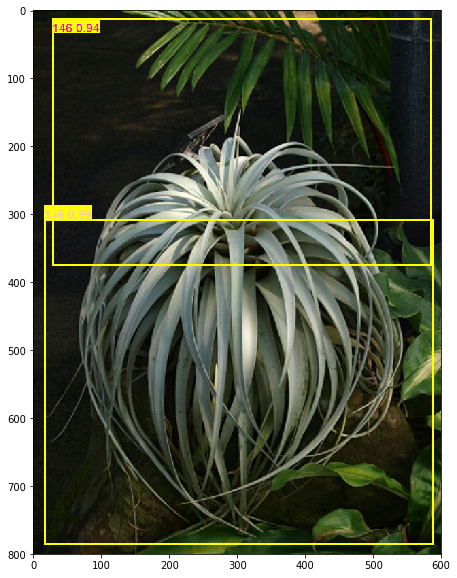

In [35]:
with torch.no_grad():
    result =  net.detect("./test_im/146.jpg", thr=0.7)
    if result:
        pred_boxes, scores, classes, rois, im_data = result
        if(len(pred_boxes)):
            result_show(im_data[0], pred_boxes, classes, scores)